In [1]:
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import QuantileTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LassoLars
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import TweedieRegressor
import wrangle

In [2]:
df = pd.read_csv('final_df.csv',index_col=[0])

In [3]:
df

,team,time_to_throw,avg_comp_air_yds,avg_att_air_yards,avg_air_yard_diff,aggressive,lon_comp_air_dist,air_yds_to_sticks,pass_att,total_yds,...,completion_pct,exp_completion_pct,completion_pct_abv_exp,year,first_round,div_round,conf_champ,superbowl,won_superbowl,percent_of_cap
name,,,,,,,,,,,,,,,,,,,,,
Aaron Rodgers,GB,2.87,6.3,9.2,-3.0,16.4,60.8,0.8,610.0,4428.0,...,65.7,62.2,3.5,2016,1.0,1.0,1.0,0.0,0.0,17.9
Aaron Rodgers,GB,2.65,5.0,7.0,-1.9,14.7,48.3,-1.4,238.0,1675.0,...,64.7,66.9,-2.2,2017,0.0,0.0,0.0,0.0,0.0,17.9
Aaron Rodgers,GB,2.95,6.0,8.8,-2.8,13.7,61.4,-0.2,597.0,4442.0,...,62.3,63.5,-1.1,2018,0.0,0.0,0.0,0.0,0.0,18.9
Aaron Rodgers,GB,2.88,5.4,8.9,-3.6,14.2,54.9,0.1,569.0,4002.0,...,62.0,63.8,-1.7,2019,0.0,1.0,1.0,0.0,0.0,18.9
Aaron Rodgers,GB,2.72,5.5,8.1,-2.6,11.2,60.3,-0.4,526.0,4299.0,...,70.7,66.4,4.4,2020,0.0,1.0,1.0,0.0,0.0,18.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Tyrod Taylor,BUF,3.13,7.2,9.9,-2.7,14.2,61.1,0.8,436.0,3023.0,...,61.7,60.4,1.3,2016,0.0,0.0,0.0,0.0,0.0,11.6
Tyrod Taylor,BUF,3.02,5.5,8.3,-2.7,15.2,51.7,-1.1,420.0,2793.0,...,62.6,65.7,-3.1,2017,1.0,0.0,0.0,0.0,0.0,9.1
Tyrod Taylor,HOU,2.78,5.2,7.5,-2.3,17.3,56.4,-0.7,150.0,966.0,...,60.7,65.3,-4.6,2021,0.0,0.0,0.0,0.0,0.0,3.0


In [4]:
train, validate, test = wrangle.split_data(df)

In [5]:
def univariate_visual(df):
    '''
    creates histplots for all of my columns
    '''
    plt.figure(figsize=(25,15))
    plt.xticks(rotation = 45)
    for i, col in enumerate(df):

        plt.title(col)
        sns.histplot(df[col])
        plt.xticks(rotation=45)
        plt.show()
        
    plt.show()

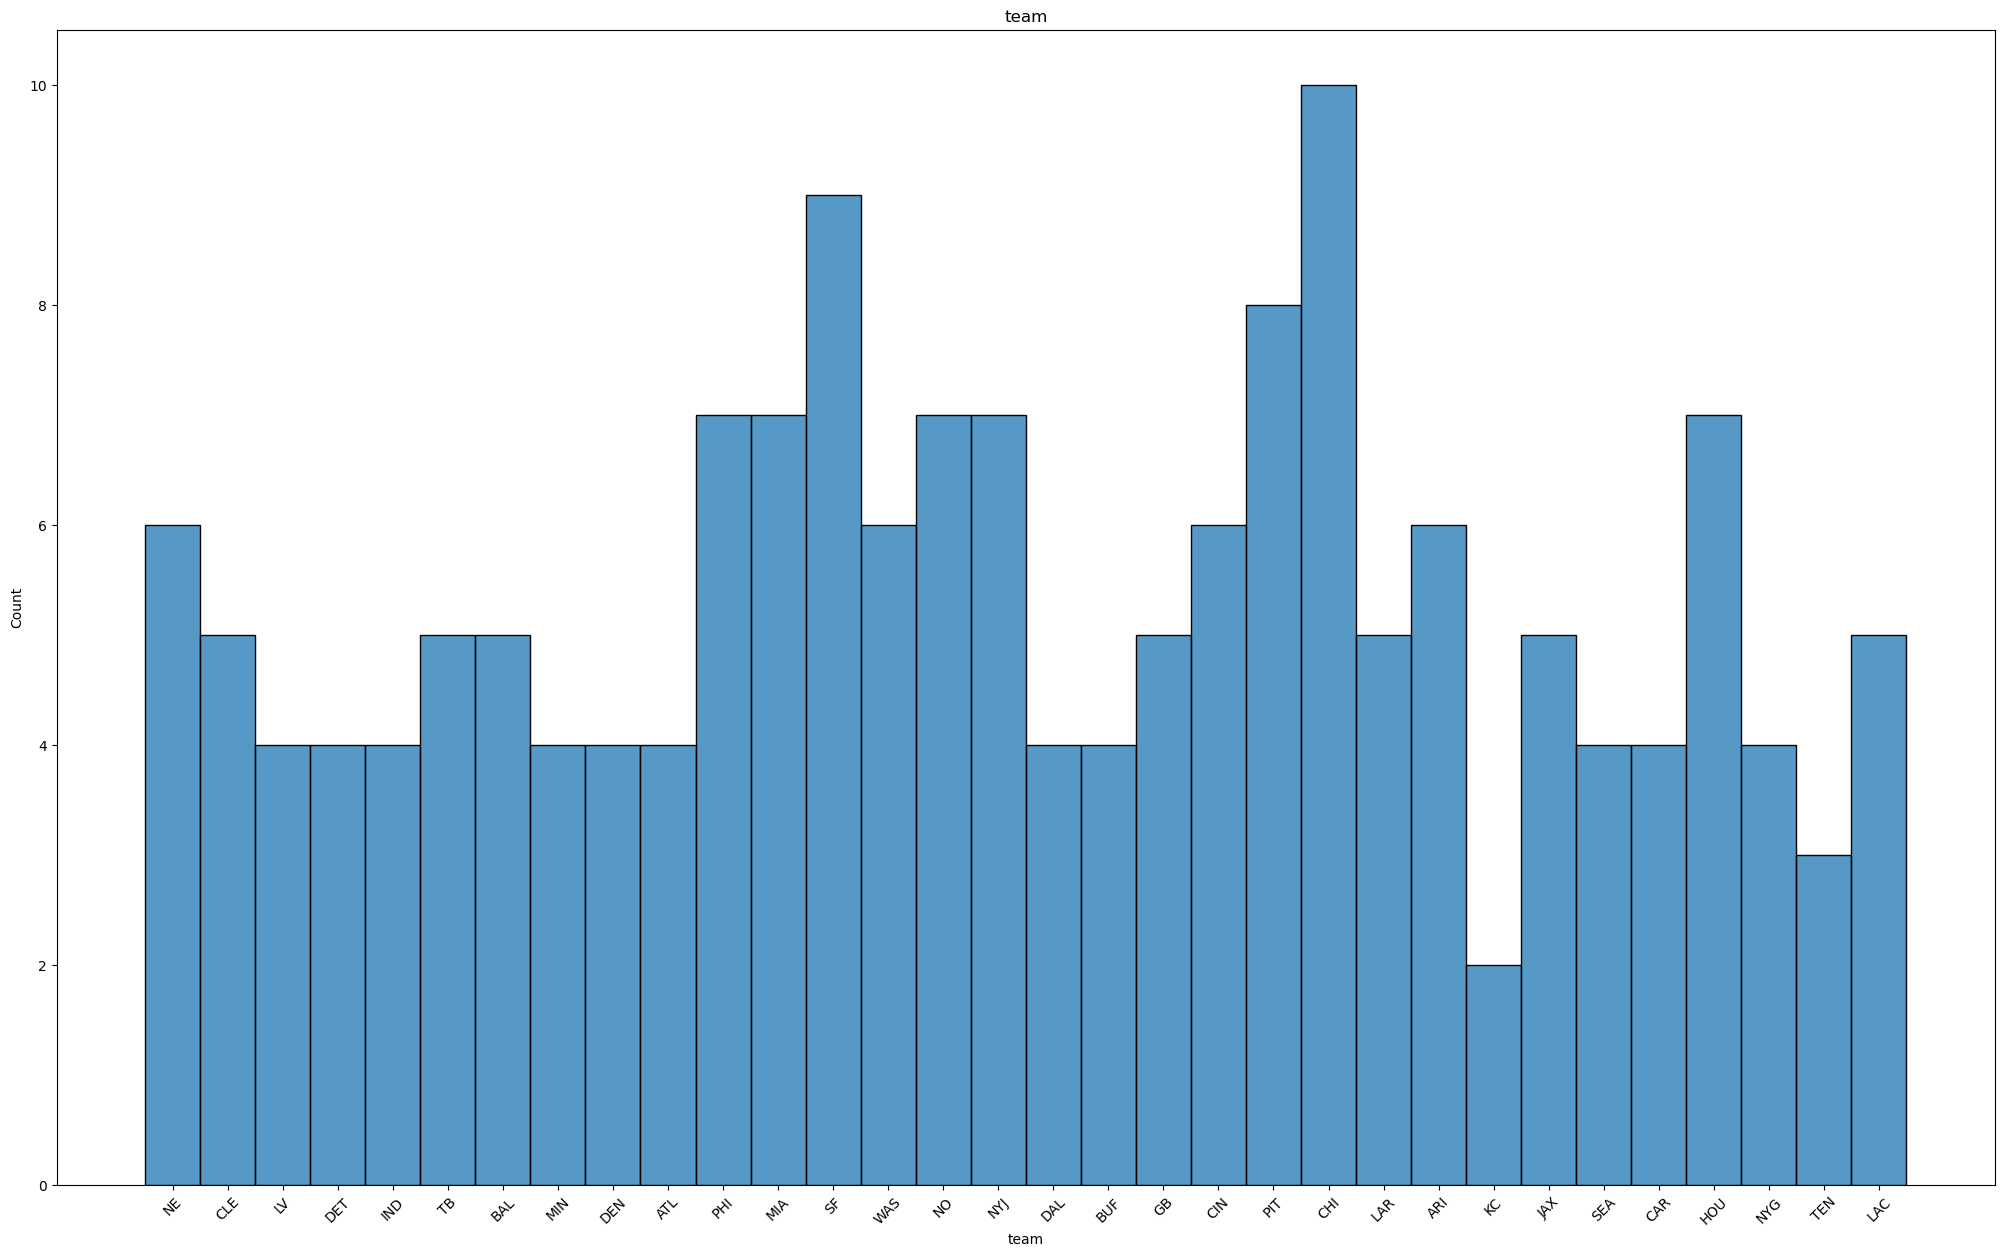

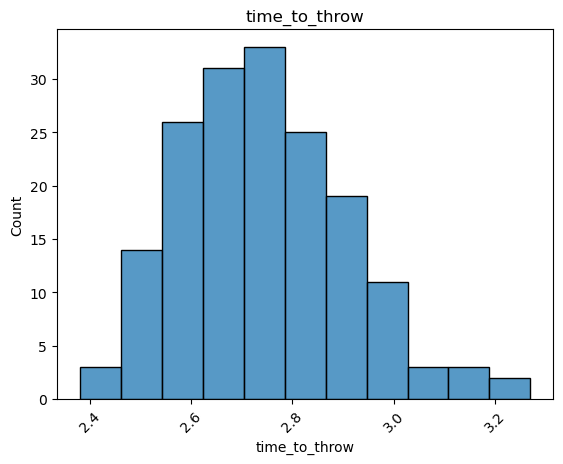

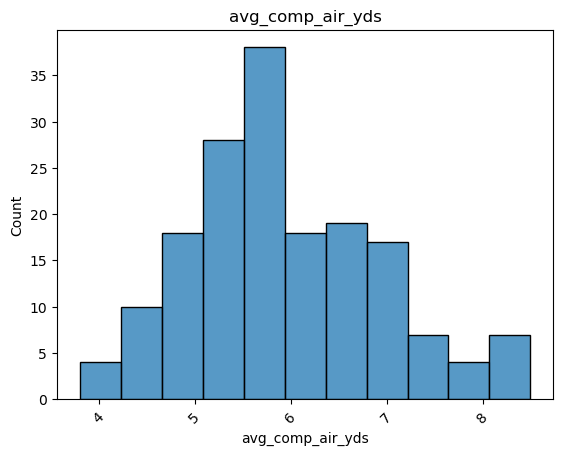

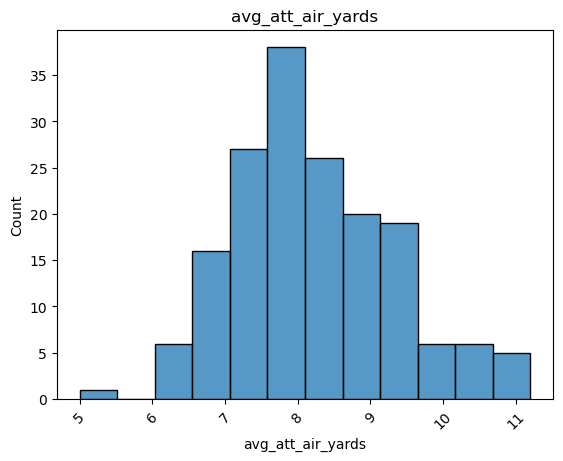

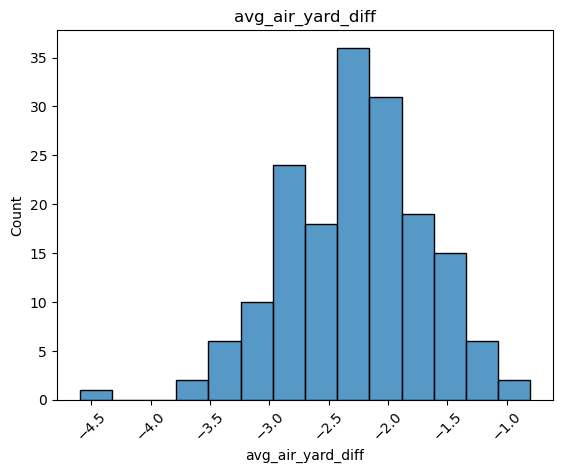

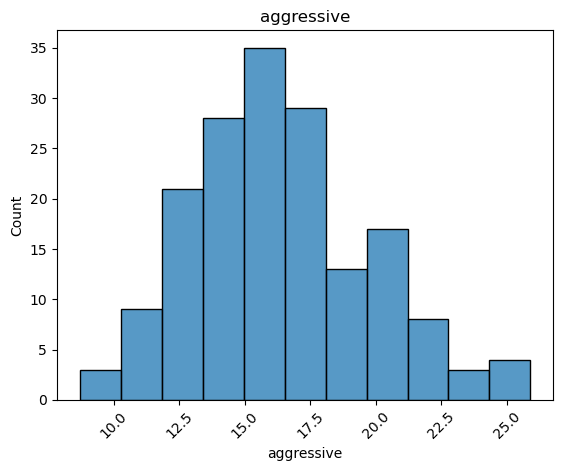

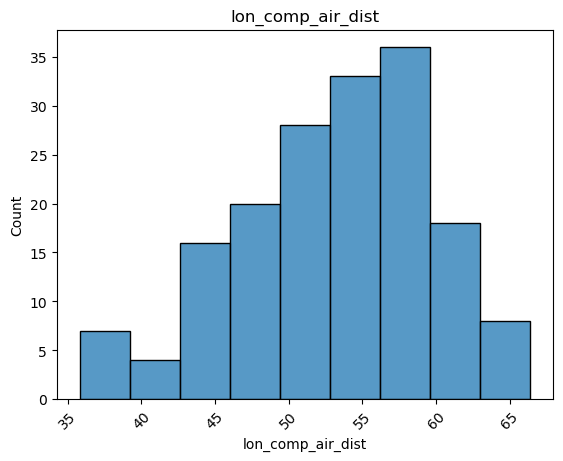

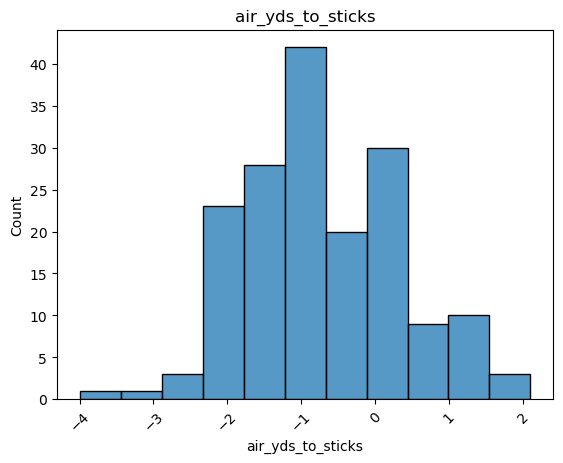

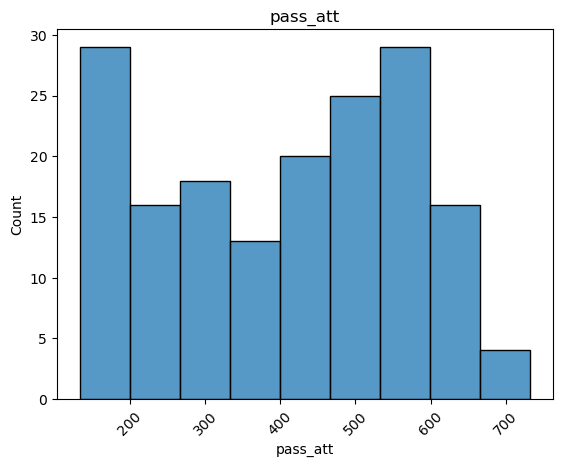

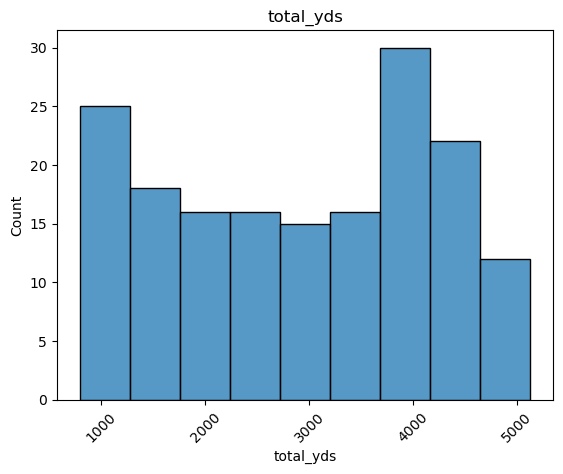

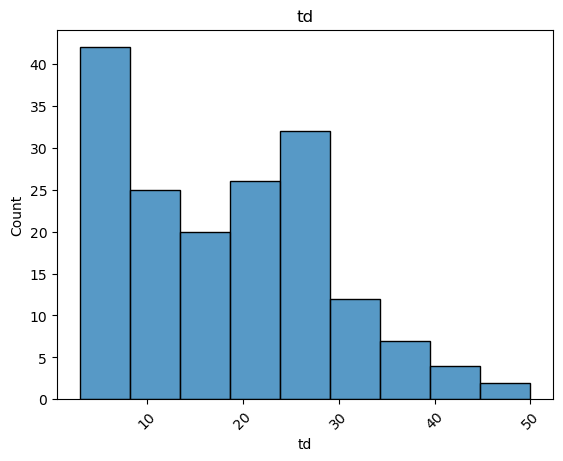

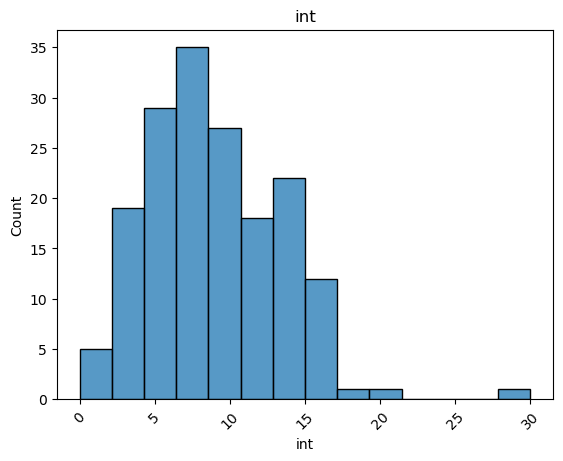

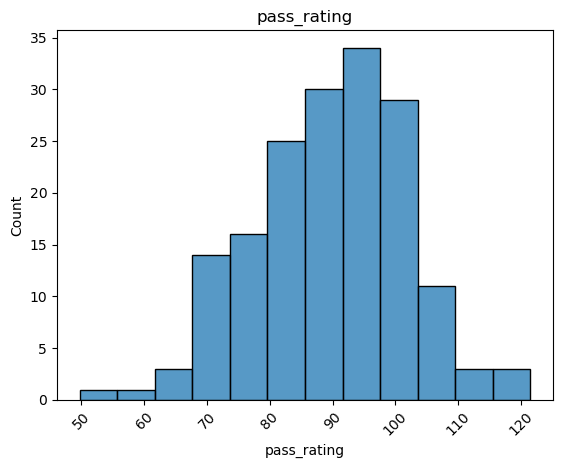

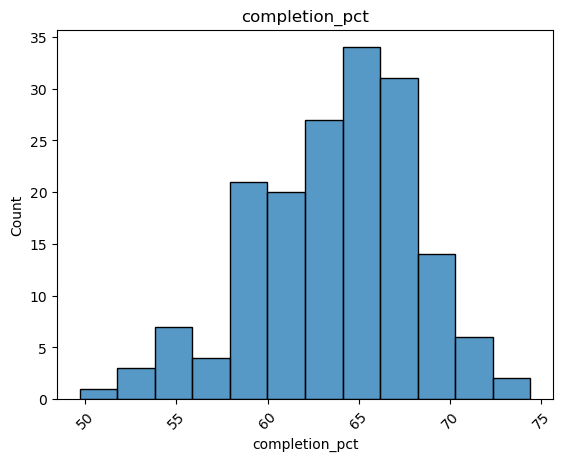

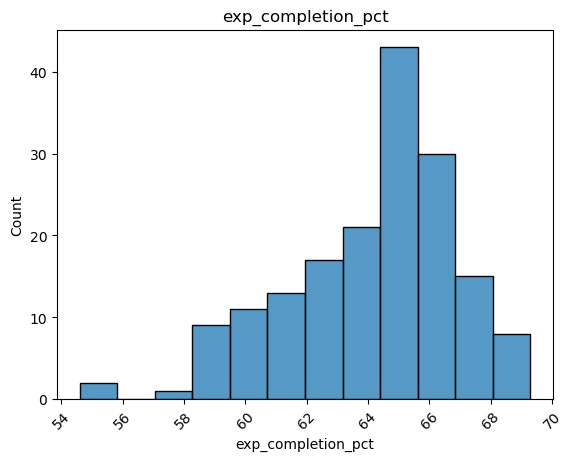

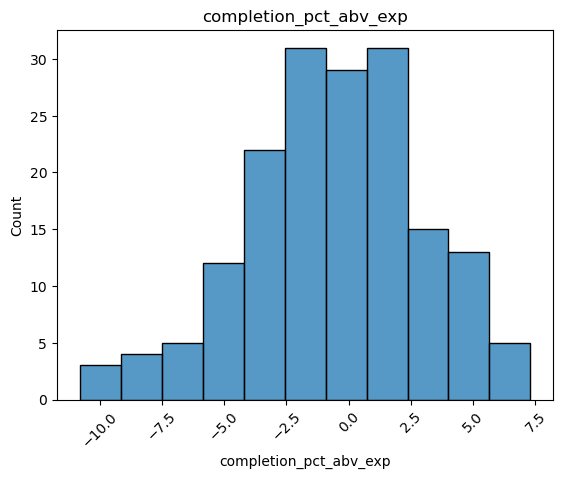

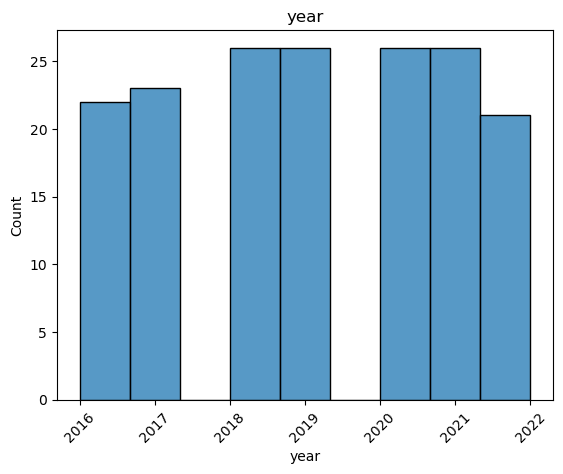

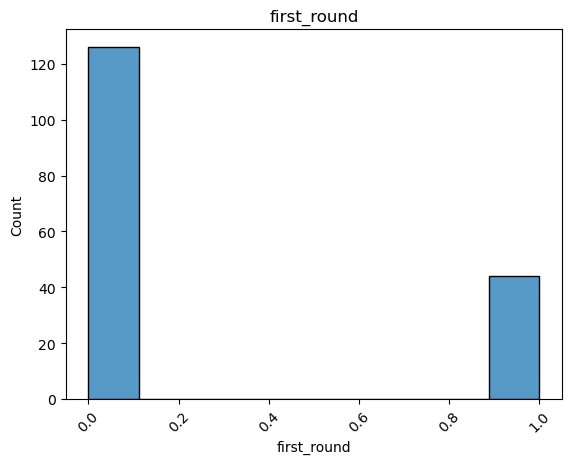

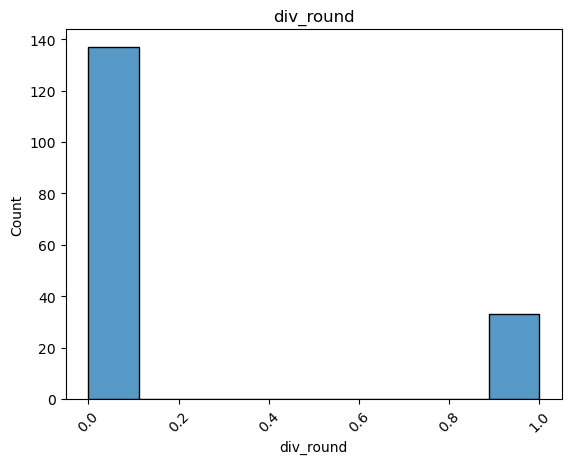

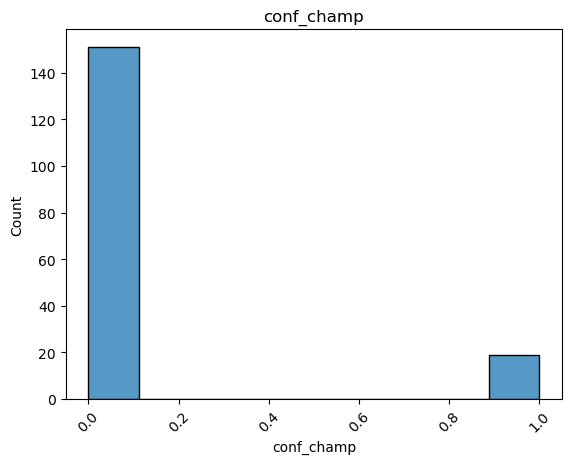

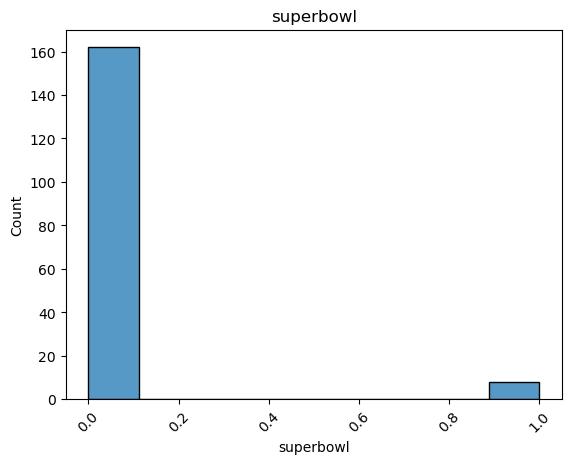

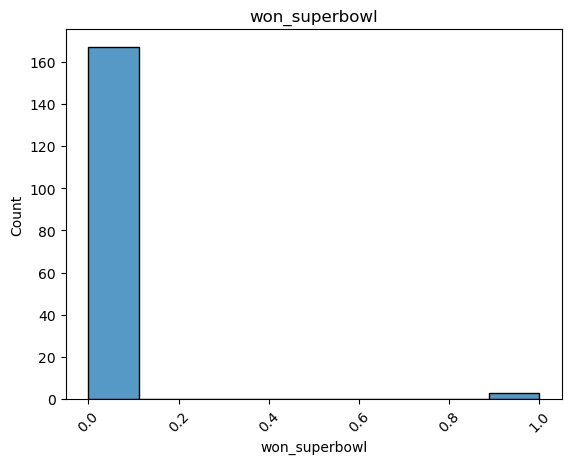

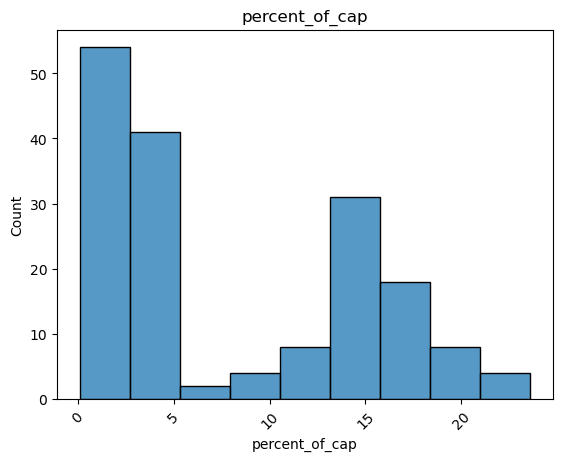

In [6]:
univariate_visual(train)

In [7]:
def correlation_charts(train,columns_list, target):
    '''
    Creates and shows visuals for Correlation tests 
    '''
    plt.figure(figsize=(14,3))
    plt.suptitle('Bivariate Exploration: The Strongest Correlators of Wine Quality')
    for i, col in enumerate(train[columns_list]):
        if col != target:

            sns.regplot(data = train, x = col, y = target, scatter_kws={'alpha': 0.1}, line_kws={'color': 'red'})

            plt.show()

In [8]:
columns_list = df.select_dtypes(exclude=['object']).columns.to_list()

In [9]:
target = columns_list.pop(len(columns_list) -1 )

In [10]:
target

'percent_of_cap'

time to throw has a neutral correlation towards our target variable
avg comp air yards has a slightly negative correlation towards our target variable
avt att air yards has a negative correlation towards our target variable
avg air yard diff has a positive correlation towards our target variable
aggressive has a negative correlation towards our target variable
longest comp air dist has a positive correlation towards our target variable
air yards to sticks has a slightly negative correlation towards our target variable
pass attempts have a strong positive correlation towards our target variable
total yards has a strong positive correlation towards our target variable
touchdowns has a strong positive correlation towards our target variable
interceptions has a positive correlation towards our target variable
pass rating has a positive correlation towards our target variable
completion percentage has a positive correlation towars our target variable
exp completion percentage has a positive correlation towards our target variable
completion pct abv exp has a positive correlation towards our target variable
year has a neutral correlation with out target variable
first round has a slightly positive correlation with our target variable
div round has a slightly positive correlation with our target variable
conference champ has a slightly positive correlation with our target variable
superbowl has a neutral correlation with our target variable
won superbowl has a slightly positive correlation with our target variable

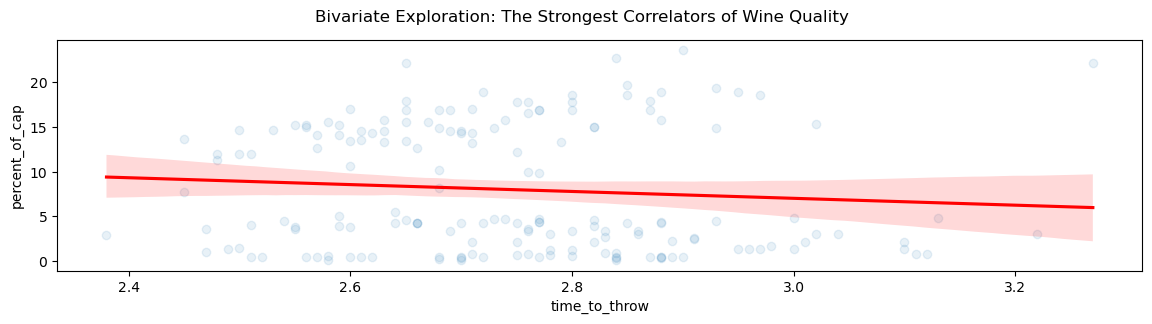

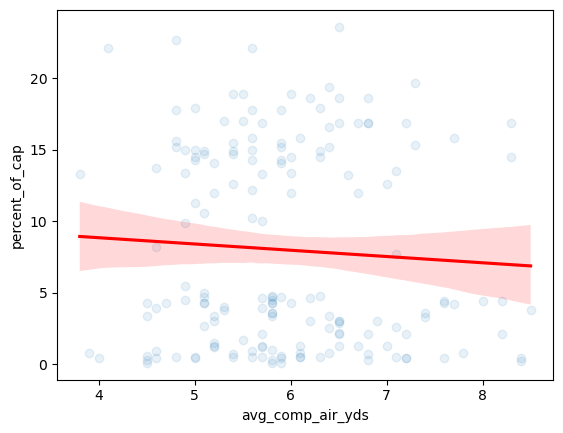

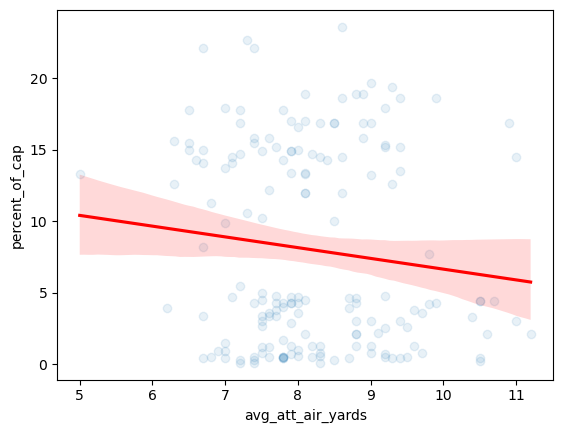

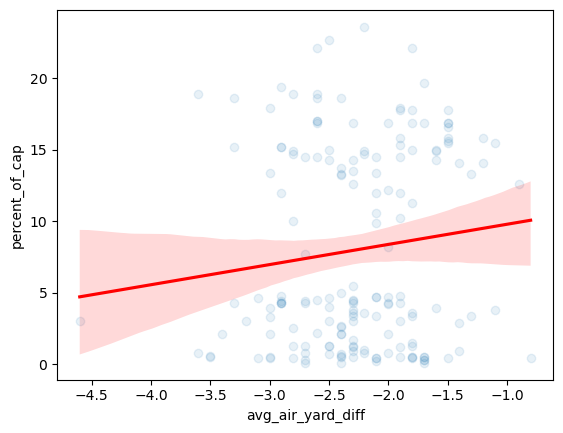

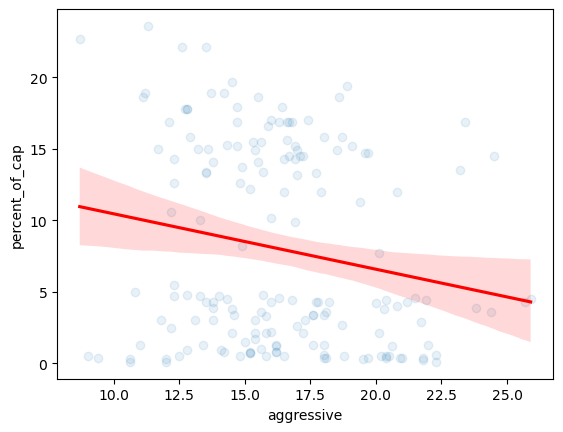

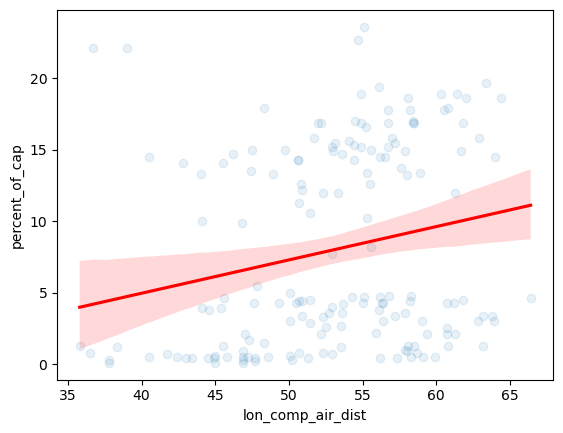

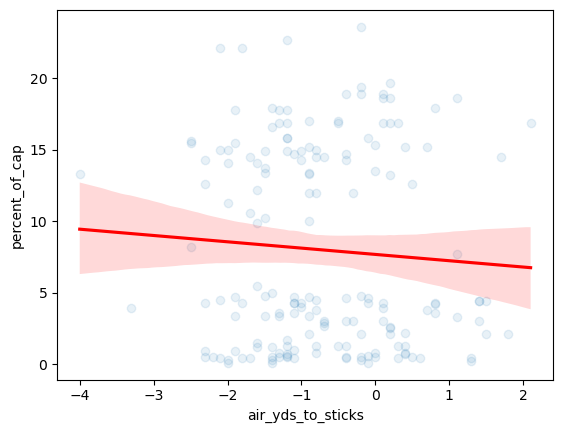

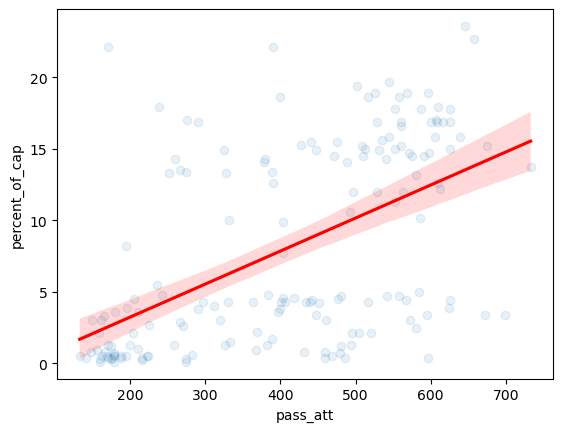

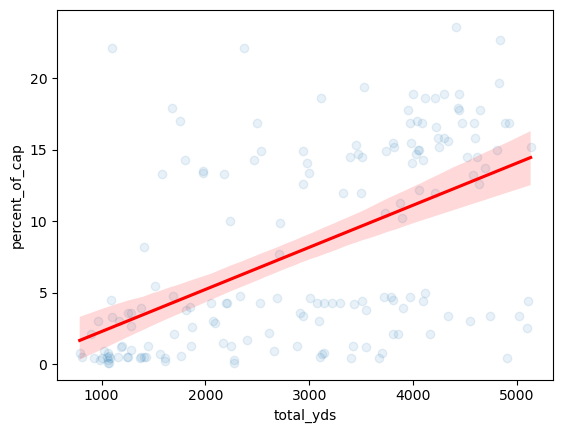

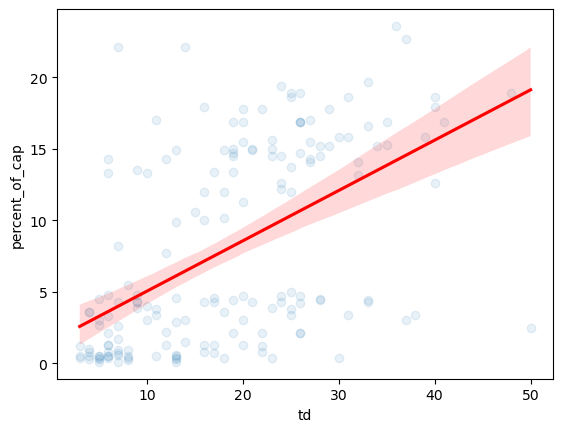

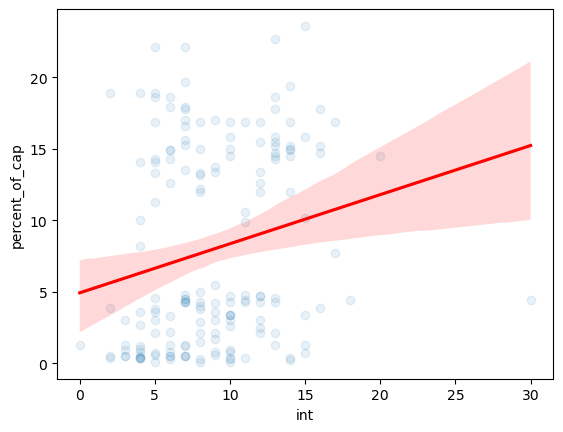

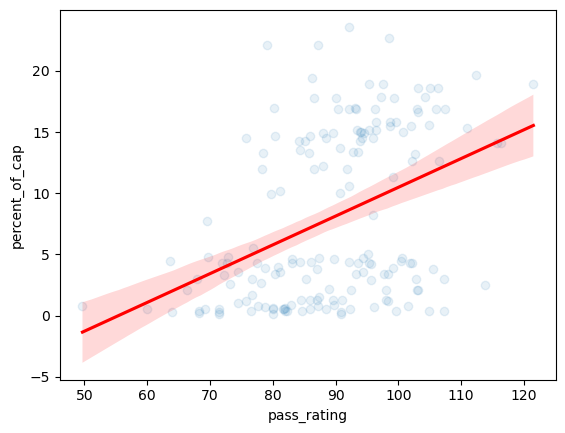

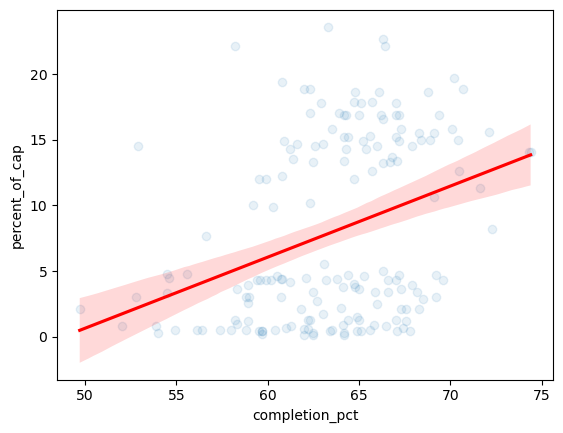

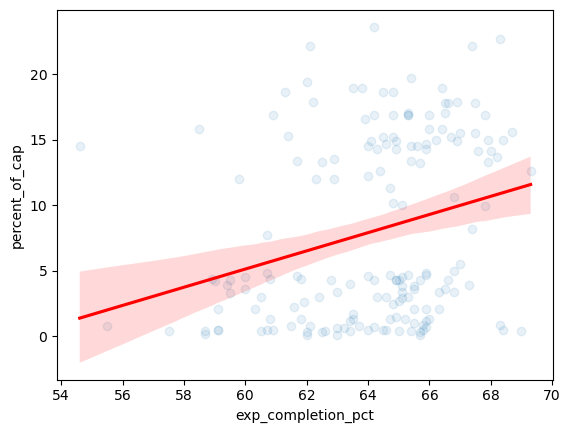

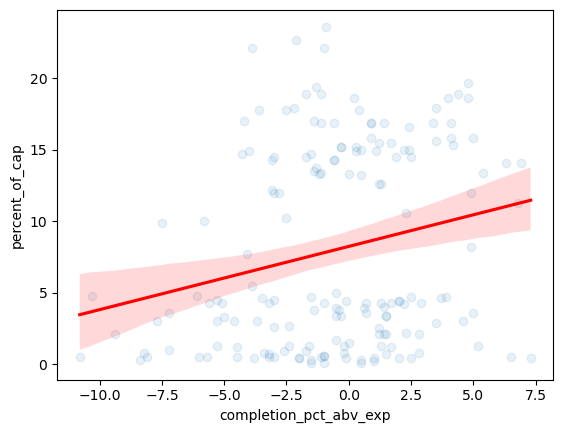

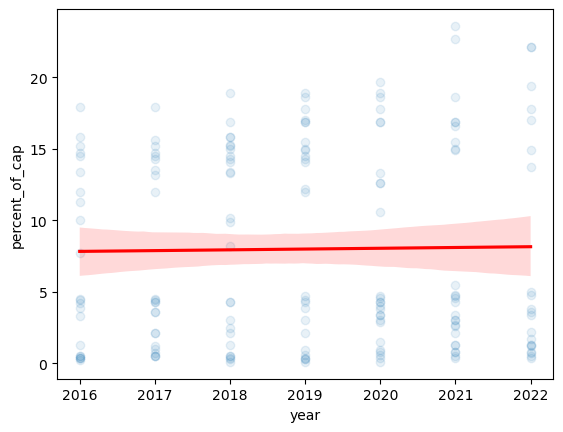

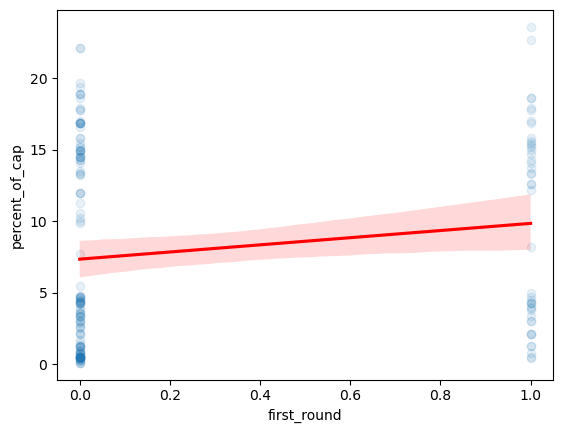

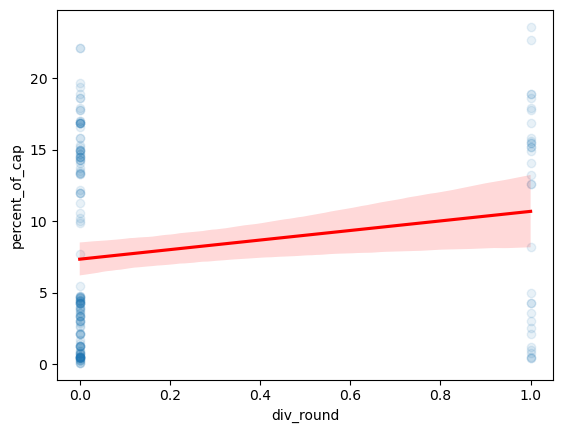

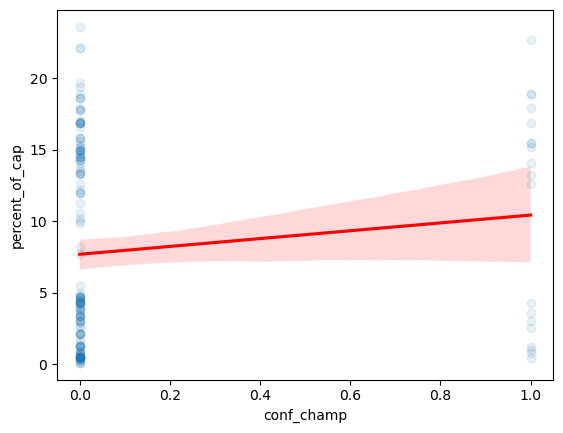

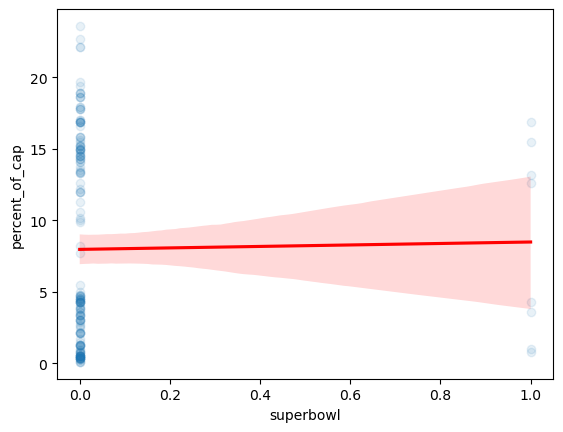

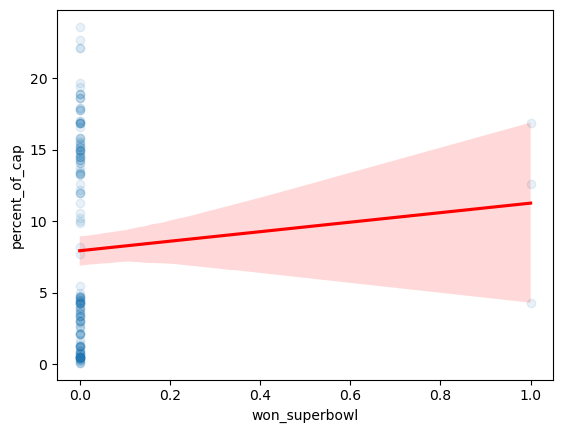

In [11]:
correlation_charts(train,columns_list, target)

In [12]:
def correlation_tests(train, columns_list, target):
    '''
    Runs a correlation test on dataframe features vs target variable
    '''
    corr_df = pd.DataFrame({'feature': [],
                        'r': [],
                       'p': []})
    for i, col in enumerate(train[columns_list]):
        r, p = stats.pearsonr(train[col], train[target])
        corr_df.loc[i] = [col, abs(r), p]
    to_return = corr_df.sort_values(by='r', ascending=False)
    to_return['target'] = target
    return to_return

p value was greater than alpha for:
> - year
> - superbowl
> - avg_comp_air_yds
> - won_superbowl
> - air_yds_to_sticks
> - time_to_throw
> - avg_air_yard_diff
> - avg_att_air_yards
> - conf_champ

- We will use RMSE as our evaluation metric

** by using baseline as an evaluation metric we can be accurate to within 6.9% <br>
** 6.9% will be the baseline RMSE we will use for this project <br>
<br>
** I will be evaluating models developed using four different model types and various hyperparameter configurations * Models will be evaluated on train and validate data * The model that performs the best will then be evaluated on test data

Feature we are moving forward with
> - total_yds
> - pass_att
> - td
> - pass_rating
> - completion_pct
> - exp_completion_pct
> - completion_pct_abv_exp
> - lon_comp_air_dist
> - int
> - div_round
> - aggressive
> - first_round

In [13]:
correlation_tests(train, columns_list, target)

,feature,r,p,target
8,total_yds,0.544151,1.729665e-14,percent_of_cap
7,pass_att,0.543016,2.007672e-14,percent_of_cap
9,td,0.533725,6.665897e-14,percent_of_cap
11,pass_rating,0.410384,2.727552e-08,percent_of_cap
12,completion_pct,0.349275,3.037556e-06,percent_of_cap
13,exp_completion_pct,0.274073,2.984785e-04,percent_of_cap
14,completion_pct_abv_exp,0.227828,2.808117e-03,percent_of_cap
5,lon_comp_air_dist,0.220230,3.904487e-03,percent_of_cap
10,int,0.209845,6.023370e-03,percent_of_cap
17,div_round,0.191376,1.242001e-02,percent_of_cap


In [14]:
X_train, X_validate, X_test, y_train, y_validate, y_test = wrangle.get_X_train_val_test(train,validate, test, columns_list,target)

In [17]:
def scale_data(train,
               validate,
               test,
               cols = columns_list):
    '''Takes in train, validate, and test set, and outputs scaled versions of the columns that were sent in as dataframes'''
    #Make copies for scaling
    train_scaled = train.copy() #Ah, making a copy of the df and then overwriting the data in .transform() to remove warning message
    validate_scaled = validate.copy()
    test_scaled = test.copy()
    #Initiate scaler, using Min max scaler
    scaler = MinMaxScaler()
    #Fit to train only
    scaler.fit(train[cols])
    #Creates scaled dataframes of train, validate, and test. This will still preserve columns that were not sent in initially.
    train_scaled[cols] = scaler.transform(train[cols])
    validate_scaled[cols] = scaler.transform(validate[cols])
    test_scaled[cols] = scaler.transform(test[cols])

    return train_scaled, validate_scaled, test_scaled


In [18]:
X_train, X_validate, X_test = wrangle.scale_data(X_train,
               X_validate,
               X_test,
               cols = columns_list)

In [19]:
df1, df2, df3 = wrangle.get_model_numbers(X_train, X_validate, X_test, y_train, y_validate, y_test)

/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_glm/glm.py:284: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res)


In [20]:
df1

,model_train,rmse,r2
0,baseline,6.913004,0.000000
1,ordinary least squared(OLS),5.483580,0.370791
2,lasso lars(lars),6.723182,0.054163
3,Polynomial Regression(poly2),0.145358,0.999558
4,Generalized Linear Model (GLM),5.881286,0.276213


In [21]:
df2

,model_validate,rmse,r2
0,baseline,6.913004e+00,0.000000e+00
1,ordinary least squared(OLS),6.911341e+00,6.184233e-02
2,lasso lars(lars),7.246532e+00,-3.136319e-02
3,Polynomial Regression(poly2),1.734163e+11,-5.906512e+20
4,Generalized Linear Model (GLM),7.009200e+00,3.508688e-02
